<a href="https://colab.research.google.com/github/jibook/git-remote/blob/master/02_class_iris_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from sklearn.datasets import load_iris

In [5]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
data = load_iris()
type(data)

sklearn.utils.Bunch

In [19]:
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [20]:
from IPython.display import HTML

In [21]:
HTML(data.DESCR.replace('|n','<br/>'))

In [8]:
from sklearn import datasets
digits = datasets.load_digits()

In [9]:
digits.images.shape

(1797, 8, 8)

In [10]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
import matplotlib.pyplot as plt

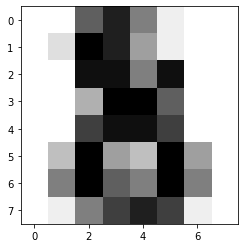

In [12]:
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r)

In [13]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
import os
import tarfile
from six.moves import urllib

In [26]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


In [27]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()


In [28]:
fetch_housing_data()

In [29]:
import pandas as pd


def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)


In [31]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [32]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [33]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [34]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


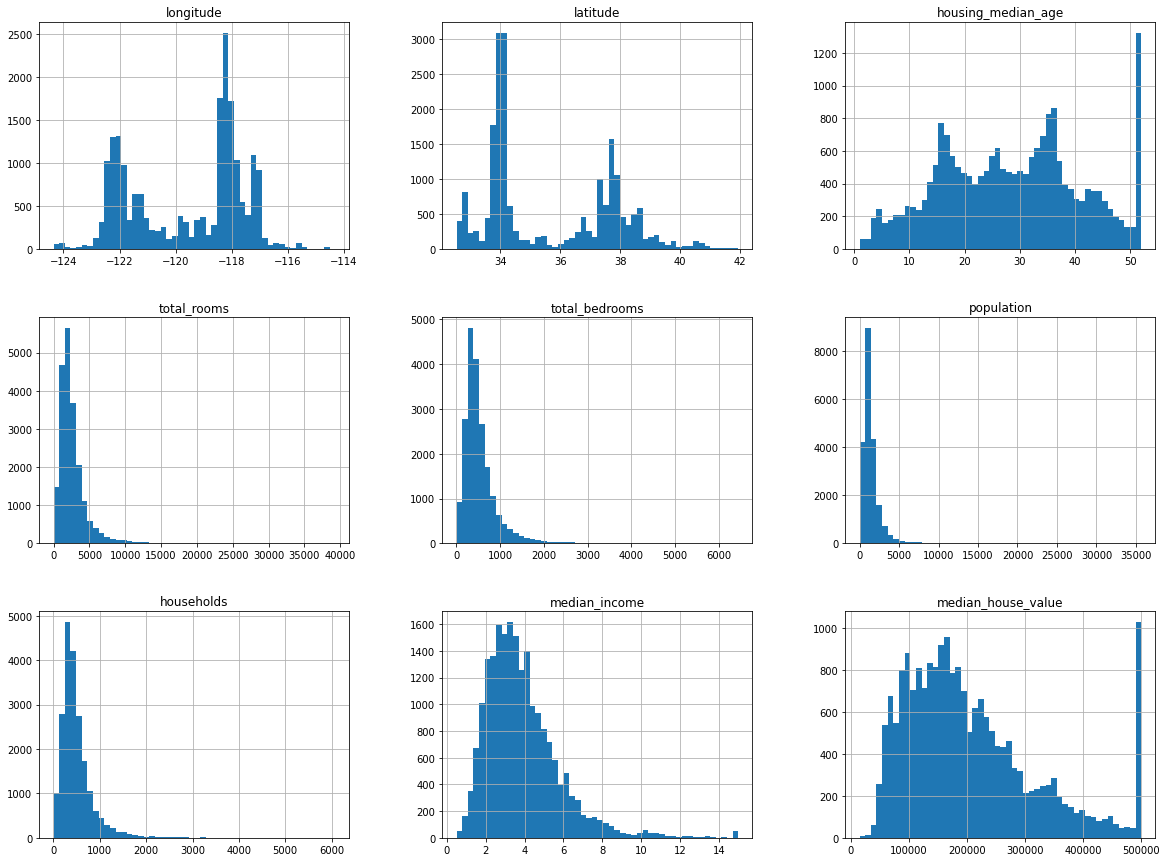

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [59]:
import pandas as pd
# housing.to_csv('C:\Users\jhjh3\AI\MLdata\housing.csv')
housing.to_csv('./housing.csv')

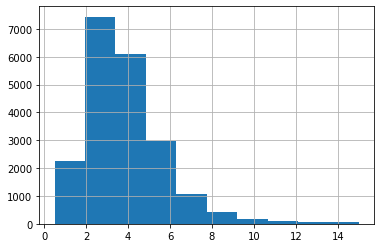

In [39]:
housing["median_income"].hist()

In [42]:
import numpy as np

In [43]:
# 소득 카테고리 개수를 제한하기 위해 1.5로 나눕니다.
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# 5 이상은 5로 레이블합니다.
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [44]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

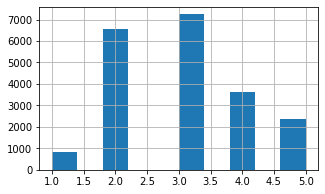

In [67]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(5,3))
housing["income_cat"].hist()
fig.savefig('income_category_hist')

In [58]:
fig.savefig('./income_category_hist')

In [60]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

In [61]:
import numpy as np
x = (np.arange(10, dtype = np.float) -3).reshape(-1,1)

In [62]:
x

array([[-3.],
       [-2.],
       [-1.],
       [ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.]])

In [63]:
import pandas as pd

In [64]:
df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]),
                  columns=['x', 'scale(x)', 'robust_scale(x)', 'minmax_scale(x)', 'maxabs_scale(x)'])

In [65]:
from sklearn.datasets import load_iris

iris = load_iris()
data1 = iris.data
data2 = scale(iris.data)

In [66]:
print("old mean:", np.mean(data1, axis=0))
print("old std:", np.mean(data1, axis=0))
print("new mean:", np.mean(data2, axis=0))
print("new std:", np.mean(data2, axis=0))


old mean: [5.84333333 3.05733333 3.758      1.19933333]
old std: [5.84333333 3.05733333 3.758      1.19933333]
new mean: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
new std: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


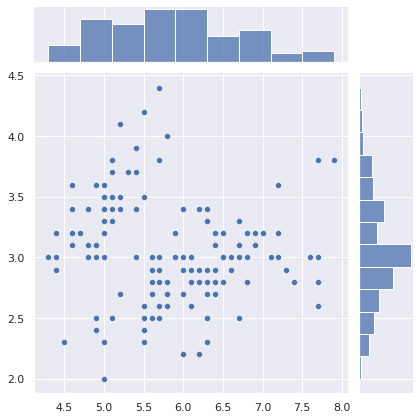

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


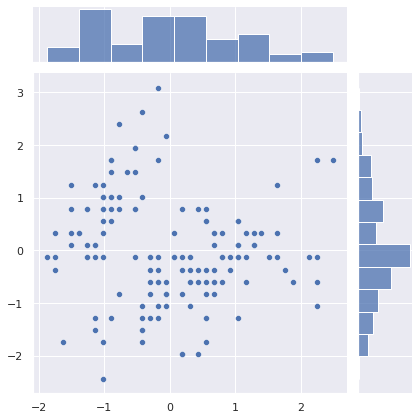

In [68]:
import seaborn as sns
sns.set();
sns.jointplot(data1[:,0], data1[:,1])
plt.show()
sns.jointplot(data2[:,0], data2[:,1])
plt.show()

In [69]:
data4 = minmax_scale(data1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


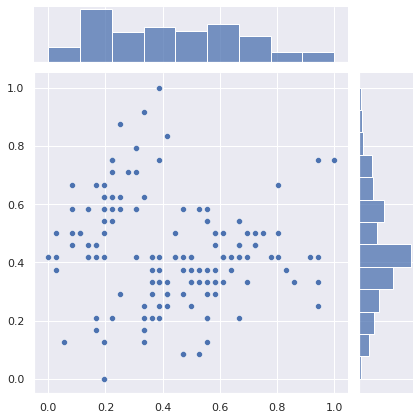

In [70]:
sns.jointplot(data4[:,0], data4[:,1])
plt.show()

In [71]:
from sklearn.preprocessing import scale, normalize

In [72]:
y1 = scale(x)
y2 = normalize(x)

In [73]:
print("original x:", x)
print("scale :|n", y1)
print("norms (scale)|n:", np.linalg.norm(y1, axis = 1))
print("normlize:|n", y2)
print("norms (normlize)|n:", np.linalg.norm(y2, axis = 1))

original x: [[-3.]
 [-2.]
 [-1.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]]
scale :|n [[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
norms (scale)|n: [1.5666989  1.21854359 0.87038828 0.52223297 0.17407766 0.17407766
 0.52223297 0.87038828 1.21854359 1.5666989 ]
normlize:|n [[-1.]
 [-1.]
 [-1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]
norms (normlize)|n: [1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


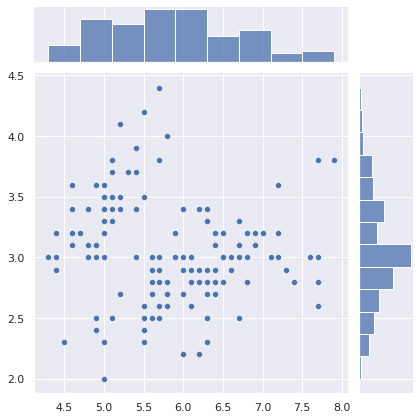

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


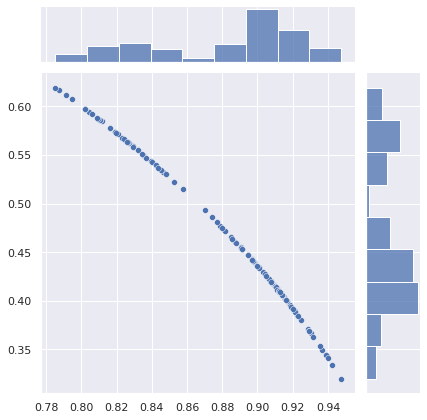

In [92]:
from sklearn.datasets import load_iris

iris = load_iris()
data1 = iris.data[:,:2]
data3 = normalize(data1)
sns.jointplot(data1[:,0], data1[:,1])
plt.show()
sns.jointplot(data3[:,0], data3[:,1])
plt.show()

In [78]:
from sklearn.preprocessing import FunctionTransformer
def all_but_first_column(X):
  return X[:,:1]

X = np.arange(12).reshape(4,3)
print(X)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [79]:
Y = FunctionTransformer(all_but_first_column).fit_transform(X)
print(Y)

[[0]
 [3]
 [6]
 [9]]


In [83]:
from sklearn.preprocessing import FunctionTransformer
def all_but_first_column(X):
  return X*0.5

X = np.arange(12).reshape(4,3)
print(X)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [84]:
Y = FunctionTransformer(all_but_first_column).fit_transform(X)
print(Y)

[[0.  0.5 1. ]
 [1.5 2.  2.5]
 [3.  3.5 4. ]
 [4.5 5.  5.5]]
